In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
df = pd.read_csv('sale/sale.csv')  # Replace 'your_dataset.csv' with the actual file path or URL

#seperate dates for future plotting
dates = pd.to_datetime(df['Date'])

# Extract the relevant features
data = df[['Holiday', 'Season', 'Month', 'Quantity']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split into input (features) and output (demand) variables
features = data_scaled[:, :-1]
demand = data_scaled[:, -1]

In [23]:
#Split the dataset into training and testing sets
# Determine the train-test split ratio
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

# Split the data into train and test sets
train_features = features[:train_size]
train_demand = demand[:train_size]
train_dates = dates[:train_size]
test_features = features[train_size:]
test_demand = demand[train_size:]
test_dates = dates[train_size:]

In [24]:
#Reshape the input data for LSTM
# Reshape the features data to match LSTM input shape (samples, time steps, features)
n_features = features.shape[1]
train_features = train_features.reshape((train_features.shape[0], 1, n_features))
test_features = test_features.reshape((test_features.shape[0], 1, n_features))

In [25]:
#Build and train the LSTM model
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_features, train_demand, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
11/11 [==============================] - 4s 4ms/step - loss: 0.1160
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0982
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0818
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0580
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0524
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0427
Epoch 11/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0407
Epoch 12/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0391
Epoch 13/50
11/11 [==============================

In [26]:
#Make predictions on the test set
# Generate predictions on the test set
predictions = model.predict(test_features)

# Inverse scale the predictions and actual demand
predictions = scaler.inverse_transform(np.concatenate((test_features.reshape(test_features.shape[0], -1), predictions), axis=1))[:, -1]
actual_demand = scaler.inverse_transform(np.concatenate((test_features.reshape(test_features.shape[0], -1), test_demand.reshape(-1, 1)), axis=1))[:, -1]

# Compare predictions with actual demand
results = pd.DataFrame({'Actual Demand': actual_demand, 'Predicted Demand': predictions})
print(results)

2/2 [==============================] - 0s 6ms/step
    Actual Demand  Predicted Demand
0             4.0          4.430096
1             6.0          4.647331
2             4.0          4.647331
3             5.0          4.647331
4             5.0          4.647331
5             1.0          6.438528
6             3.0          6.438528
7             2.0          5.893780
8             2.0          6.438528
9             2.0          6.438528
10            3.0          6.820408
11            5.0          6.820408
12            5.0          6.820408
13            6.0          6.820408
14           10.0          7.211094
15            9.0          7.211094
16           11.0          7.211094
17           12.0          7.211094
18           14.0         12.350368
19           13.0         12.350368
20           10.0         12.350368
21           16.0         12.350368
22           15.0         12.350368
23           11.0         10.203363
24           10.0          9.479526
25           

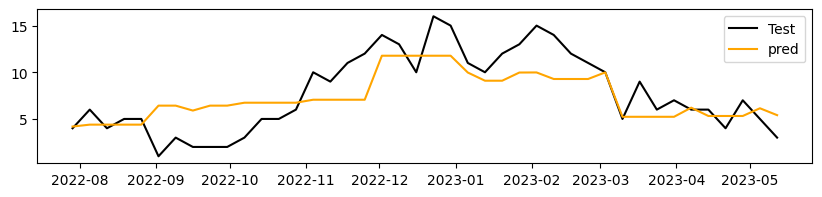

In [17]:
plt.figure(figsize=(10,2))
plt.plot(test_dates,actual_demand, color = 'black', label = 'Test')
plt.plot(test_dates,predictions, color = 'orange', label = 'pred')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Assuming you have the actual_demand and predictions arrays

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_demand, predictions))

print('RMSE:', rmse)

RMSE: 2.7487838281052723
